### **1. Introduction and Objective** ###

#### **Introduction**
Life expectancy is a key indicator of a nation's overall health and development, reflecting the quality of healthcare systems, socioeconomic conditions, and public health measures. This project explores the **Impact of Socioeconomic Factors on Life Expectancy**, focusing on analyzing how variables such as income, literacy, poverty, healthcare spending, and access to clean water shape life expectancy outcomes globally. By leveraging data from the **World Health Organization (WHO)** and the **United Nations (UN)**, the project aims to uncover trends and relationships that can inform policies and interventions to improve health outcomes worldwide.

#### **Objective**
The primary goal of this project is to understand the influence of socioeconomic and health-related factors on life expectancy through exploratory analysis, hypothesis testing, and statistical modeling. Specifically, the project aims to:

1. Analyze the **distribution and regional trends** of life expectancy and socioeconomic factors, such as income, literacy, and poverty, over the past 20 years.
2. Identify the **top three socioeconomic factors** (e.g., income, education, and healthcare access) that significantly influence life expectancy.
3. Evaluate the **impact of healthcare spending, education, and access to clean water** on life expectancy using regression analysis.

Through this analysis, we aim to test the following hypothesis:

#### **Hypothesis Testing**
- **Null Hypothesis (\(H_0\))**: Healthcare spending and clean water access have no significant impact on life expectancy.
- **Alternative Hypothesis (\(H_a\))**: Healthcare spending and clean water access significantly impact life expectancy.

By addressing these objectives, the project intends to provide data-driven insights into how socioeconomic and healthcare factors can improve life expectancy across nations.

### **2. Dataset Selection and Description** ###

For this project, I am using a dataset hosted on OpenML, sourced from the World Health Organization (WHO) and the United Nations (UN). The dataset, titled "WHO National Life Expectancy," can be accessed at "https://www.openml.org/search?type=data&status=active&id=43505". It is derived from the Global Health Observatory (GHO) repository of the WHO and enriched with socioeconomic data from the UN. These sources provide publicly available data aimed at enabling global health analysis and informed policymaking.

The purpose of this dataset is to analyze various factors influencing life expectancy and health outcomes across 193 countries. By exploring demographic, socioeconomic, and health-related variables, the dataset offers a comprehensive foundation for understanding trends and relationships that impact life expectancy globally.

Dataset Description
The dataset includes data from 193 countries, covering the years 2000 to 2016, and captures information across 32 variables. These variables span multiple categories, enabling an in-depth exploration of the influence of socioeconomic, health, and environmental factors on life expectancy.

Key Variables and Categories
Below is a description of the key variables included in the dataset, grouped by their respective categories:

**Geographical Information** 

1) country: The name of the country.
2) country_code: A unique code (e.g., ISO Alpha-3) representing each country.
3) region: The broader geographical region (e.g., Africa, Asia, Europe).

**Time Information**

4) year: Year of the data record, useful for trend analysis.

**Health Outcomes**

5) life_expect: Life expectancy at birth, a key indicator of health outcomes.
6) life_exp60: Life expectancy at age 60, showing how long people live after reaching old age.
7) adult_mortality: Mortality rate for adults aged 15-60 (per 1,000 individuals).
8) infant_mort: Infant mortality rate (deaths before age 1 per 1,000 live births).
9) age1-4mort: Mortality rate for children aged 1-4 (per 1,000 children).

**Lifestyle and Health Behavior**

10) alcohol: Average alcohol consumption per capita (liters per adult per year).
11) bmi: Average body mass index, indicating overall nutrition and obesity levels.
12) age5-19thinness: Percentage of individuals aged 5-19 classified as thin.
13) age5-19obesity: Percentage of individuals aged 5-19 classified as obese.

**Vaccination and Preventative Measures**

14) hepatitis: Percentage of children vaccinated against Hepatitis B.
15) measles: Number of reported measles cases.
16) polio: Percentage of children vaccinated against Polio.
17) diphtheria: Percentage of children vaccinated against DPT (Diphtheria, Pertussis, Tetanus).

**Healthcare Access**

18) basic_water: Percentage of the population with access to basic drinking water.
19) doctors: Number of physicians per 1,000 people.
20) hospitals: Number of hospitals per 1,000 people.

**Economic Indicators**

21) gni_capita: Gross National Income per capita (USD).
22) gghe-d: General government health expenditure as a percentage of total government spending.
23) che_gdp: Current health expenditure as a percentage of GDP.

**Additional Socioeconomic Factors**

24) une_pop: Population size from United Nations data.
25) une_infant: Infant mortality rate (cross-validation measure).
26) une_life: Life expectancy (cross-validation measure).
27) une_hiv: Percentage of the population living with HIV/AIDS.
28) une_gni: GNI per capita (UN source, cross-validation).
29) une_poverty: Percentage of the population below the poverty line.
30) une_edu_spend: Education expenditure as a percentage of GDP.
31) une_literacy: Adult literacy rate (%).
32) une_school: Average years of schooling.


**Purpose of the Dataset**

This dataset is ideal for analyzing the relationships between life expectancy and a wide range of contributing factors, including socioeconomic, health-related, and environmental variables. It enables the study of:

**Global and regional health disparities.**

The impact of economic and lifestyle factors on life expectancy.
How access to healthcare services, education, and clean water influences health outcomes.

**Potential Applications**

Trend Analysis: Evaluate changes in life expectancy over time and across regions.
Predictive Modeling: Build statistical or machine learning models to predict life expectancy based on socioeconomic and health variables.
Policy Recommendations: Identify key areas for intervention, such as healthcare spending, vaccination programs, or access to clean water.
This dataset provides a robust foundation for understanding the Impact of Socioeconomic Factors on Life Expectancy, aligning well with the project's goal to explore these relationships systematically.

### **3. Data Pre-Processing** ###


In [20]:
import pandas as pd

# Specify the file location
file_path = '/home/sushi/Downloads/dataset'

# Open the file and read line by line
with open(file_path, 'r') as file:
    lines = file.readlines()

# Find the index where the data starts (after @DATA)
for idx, line in enumerate(lines):
    if "@DATA" in line.upper():
        data_start_idx = idx + 1
        break

# Extract the attribute names from lines (metadata before @DATA)
attributes = []
for line in lines[17:50]:  # Adjust based on where attributes are located
    if "@ATTRIBUTE" in line.upper():
        attributes.append(line.split()[1])  # Extracting the attribute name

# Add the missing first column manually (likely 'country')
attributes.insert(0, 'country')

# Debug: Check the number of attributes
print(f"Extracted {len(attributes)} attributes: {attributes}")

# Extract the actual data starting from the data_start_idx
data_lines = lines[data_start_idx:]

# Debug: Check the number of columns in the data
first_data_row = data_lines[0].strip().split(',')
print(f"First row of data has {len(first_data_row)} columns.")

# Load the data into a pandas DataFrame (ensure the columns match)
df = pd.DataFrame([x.strip().split(',') for x in data_lines], columns=attributes)

# Replace missing values ("?") with NaN
df.replace('?', pd.NA, inplace=True)

# Display the first few rows to check
print(df.head())
print(df.columns)


Extracted 32 attributes: ['country', 'country_code', 'region', 'year', 'life_expect', 'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles', 'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals', 'gni_capita', 'gghe-d', 'che_gdp', 'une_pop', 'une_infant', 'une_life', 'une_hiv', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school']
First row of data has 32 columns.
  country country_code  region  year life_expect          life_exp60 adult_mortality          infant_mort            age1-4mort             alcohol   bmi age5-19thinness age5-19obesity hepatitis measles polio diphtheria basic_water doctors hospitals gni_capita   gghe-d  che_gdp    une_pop une_infant           une_life une_hiv une_gni une_poverty une_edu_spend       une_literacy une_school
0  Angola          AGO  Africa  2000     47.3373  14.734000000000002        383.5583             0.137985              0.025695  

In [21]:
df.head()
# df.shape
df.shape


(3111, 32)

There are 3111 rows and 32 columns available in the dataset

In [22]:
#checking for missing values in the dataset
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

Certain columns, such as `une_poverty`, `une_edu_spend`, `une_literacy`, `une_school`, and `hospitals`, have a substantial proportion of missing values. To address this, I plan to identify columns with more than 80% missing data and remove them from the dataset. Additionally, many columns, including `alcohol`, `bmi`, `age5-19thinness`, `age5-19obesity`, `hepatitis`, `measles`, `polio`, `diphtheria`, `basic_water`, `doctors`, `hospitals`, `gni_capita`, `gghe-d`, `che_gdp`, `une_pop`, `une_hiv`, `une_gni`, `une_poverty`, `une_edu_spend`, `une_literacy`, and `une_school`, contain missing values. These will be imputed using either the mean or median, depending on their respective distributions.

In [23]:
import pandas as pd
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100
# Filter columns with 80% or more missing values
columns_80_missing = missing_percent[missing_percent >= 80]

# Display the columns with 80% or more missing values
print("Columns with 80% or more missing values:")
print(columns_80_missing)

dataRM = df.drop(columns=columns_80_missing.index)


Columns with 80% or more missing values:
hospitals       95.821279
une_literacy    81.645773
dtype: float64


In [24]:

# List of columns to exclude
exclude_columns = ['country', 'country_code', 'region']
data_numeric = dataRM.copy()

# Convert all columns except excluded ones to numeric
for col in data_numeric.columns:
    if col not in exclude_columns:
        data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')
print(data_numeric.dtypes)

# Check for missing values in numeric columns
print(data_numeric.isna().sum())


country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_school         float64
dtype: object
country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_m

I noticed that all columns are categorized as `object` data types, despite being numeric in nature. This may be due to the presence of `NaN`, `NA`, or other missing values, or possibly the format in which the data was exported. To address this, I plan to convert all columns to numeric data types, excluding `country`, `country_code`, and `region`, before proceeding with missing value imputation.


Missing Values in Each Column (Before Imputation):
country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_school         2306
dtype: int64


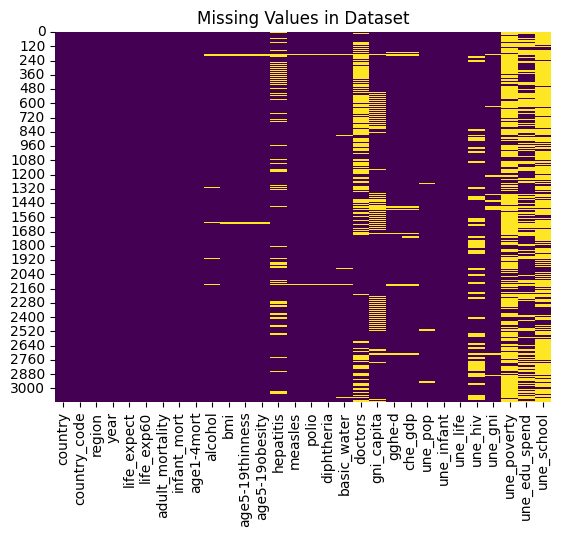


Missing Values After Imputation:
country            0
country_code       0
region             0
year               0
life_expect        0
life_exp60         0
adult_mortality    0
infant_mort        0
age1-4mort         0
alcohol            0
bmi                0
age5-19thinness    0
age5-19obesity     0
hepatitis          0
measles            0
polio              0
diphtheria         0
basic_water        0
doctors            0
gni_capita         0
gghe-d             0
che_gdp            0
une_pop            0
une_infant         0
une_life           0
une_hiv            0
une_gni            0
une_poverty        0
une_edu_spend      0
une_school         0
dtype: int64


In [25]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to exclude
exclude_columns = ['country', 'country_code', 'region']

# Create a copy of the dataset
data_numeric = dataRM.copy()

# Convert all columns except excluded ones to numeric
for col in data_numeric.columns:
    if col not in exclude_columns:
        data_numeric[col] = pd.to_numeric(data_numeric[col], errors='coerce')

# Check for missing values in numeric columns
print("\nMissing Values in Each Column (Before Imputation):")
print(data_numeric.isna().sum())

# Visualize missing values
sns.heatmap(data_numeric.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

# Fill missing values with median only for numeric columns
data_Missing_filled = data_numeric.copy()  # Make a copy for safety
numeric_cols = data_numeric.select_dtypes(include=['float64', 'int64']).columns
data_Missing_filled[numeric_cols] = data_numeric[numeric_cols].fillna(data_numeric[numeric_cols].median())

# Verify that missing values have been filled
print("\nMissing Values After Imputation:")
print(data_Missing_filled.isna().sum())



**Handling Missing Values**

Given that most columns in the dataset are skewed, I chose median imputation over mean imputation to handle the missing values. To ensure all missing values were successfully imputed, I rechecked the dataset, and the process was completed as expected.

In [26]:
#  check for duplicates
duplicates = data_Missing_filled.duplicated()
print(duplicates.sum())

0


**Duplicate Removal** 
- The dataset was checked for duplicates, and no duplicate rows were found.

In [27]:
# checking data types of each column
print(df.dtypes)
    # Display the number of unique values in each column
for column in data_Missing_filled.columns:
    print(f"Column '{column}' has {df[column].nunique()} unique values.")


country            object
country_code       object
region             object
year               object
life_expect        object
life_exp60         object
adult_mortality    object
infant_mort        object
age1-4mort         object
alcohol            object
bmi                object
age5-19thinness    object
age5-19obesity     object
hepatitis          object
measles            object
polio              object
diphtheria         object
basic_water        object
doctors            object
hospitals          object
gni_capita         object
gghe-d             object
che_gdp            object
une_pop            object
une_infant         object
une_life           object
une_hiv            object
une_gni            object
une_poverty        object
une_edu_spend      object
une_literacy       object
une_school         object
dtype: object
Column 'country' has 183 unique values.
Column 'country_code' has 183 unique values.
Column 'region' has 6 unique values.
Column 'year' has 17 unique valu

## 4) Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [28]:
# dataRM_N.describe()
import pandas as pd

# Set pandas display options
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       

print(data_Missing_filled.describe())


              year  life_expect   life_exp60  adult_mortality  infant_mort   age1-4mort      alcohol          bmi  age5-19thinness  age5-19obesity    hepatitis      measles        polio   diphtheria  basic_water      doctors     gni_capita       gghe-d      che_gdp       une_pop   une_infant     une_life      une_hiv        une_gni  une_poverty  une_edu_spend   une_school
count  3111.000000  3111.000000  3111.000000      3111.000000  3111.000000  3111.000000  3111.000000  3111.000000      3111.000000     3111.000000  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000  3111.000000    3111.000000  3111.000000  3111.000000  3.111000e+03  3111.000000  3111.000000  3111.000000    3111.000000  3111.000000    3111.000000  3111.000000
mean   2008.000000    69.146384    18.912060       193.527786     0.032496     0.003489     4.821261    25.057602         5.295918        5.963838    86.636773    85.579878    86.648023    86.460302    83.421110    20.147324   12095.593057     3.1061

**Descriptive Statistics Analysis**

The `describe()` function provides summary statistics for each numerical column, including metrics such as mean, standard deviation, minimum, and maximum values. 

- For the column `alcohol`, the mean suggests the presence of outliers, as the 75th percentile is 7.6, while the maximum value is 20.1824. 
- Similarly, the columns `age5-19thinness` and `age5-19obesity` exhibit extreme values or outliers, as indicated by their high standard deviation. 
- The column `gni_capita` also shows a noticeable gap between the mean and median, with a significantly high maximum value, further suggesting the presence of outliers. 
- Other columns, such as `gghe_d`, `che_gdp`, `une_infant`, `une_hiv`, `une_gni`, `une_poverty`, and `une_edu_spend`, also display characteristics indicative of outliers.

This analysis highlights the need for appropriate transformations to handle the skewness and outliers in the data effectively.

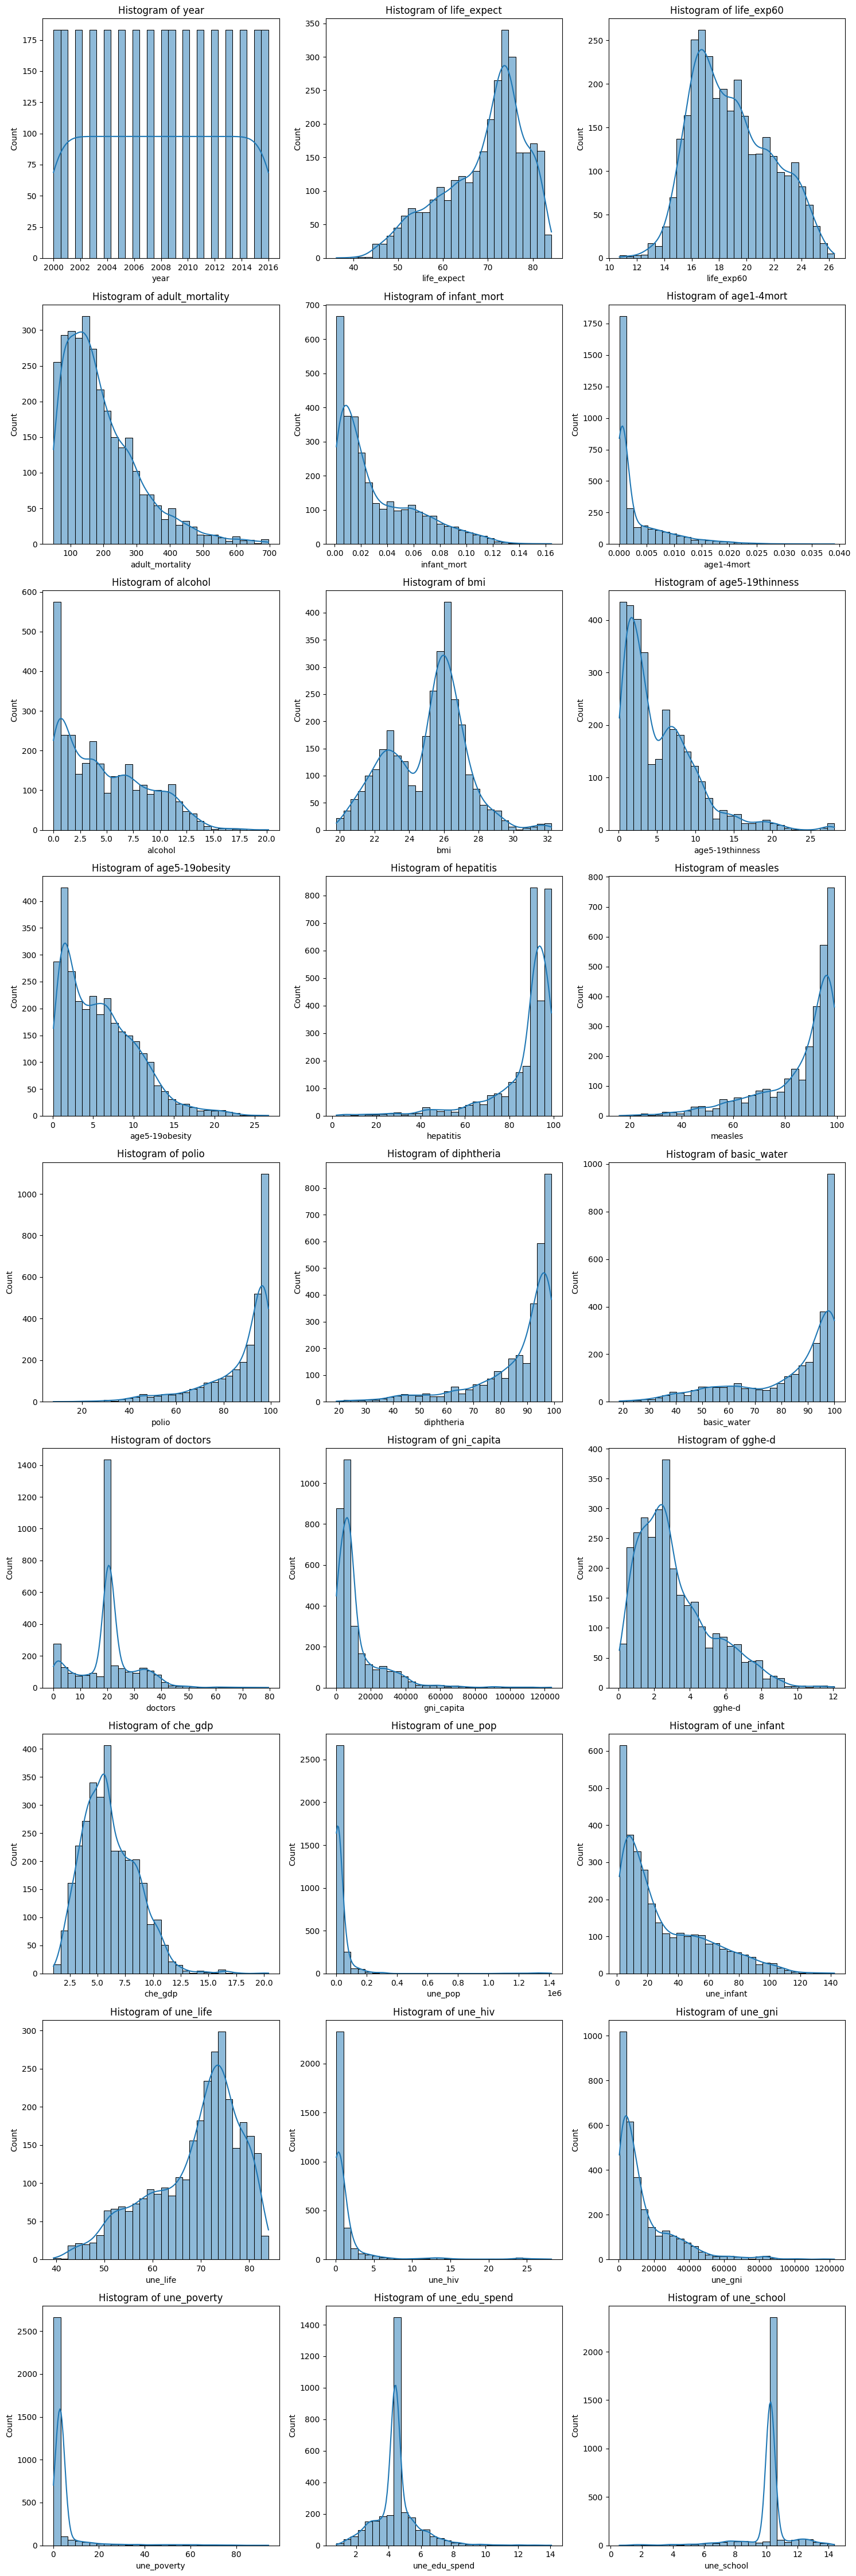

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_columns = data_Missing_filled.select_dtypes(include=['float64', 'int64']).columns

# Number of variables
num_vars = len(numeric_columns)

# Define the grid size
cols = 3  # Number of columns in the grid
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows dynamically

# Create a grid of histograms
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # Adjust grid size based on rows
axes = axes.flatten()  # Flatten the axes for easier iteration

# Plot histograms for each variable
for i, column in enumerate(numeric_columns):
    sns.histplot(data=data_Missing_filled, x=column, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between plots
plt.show()


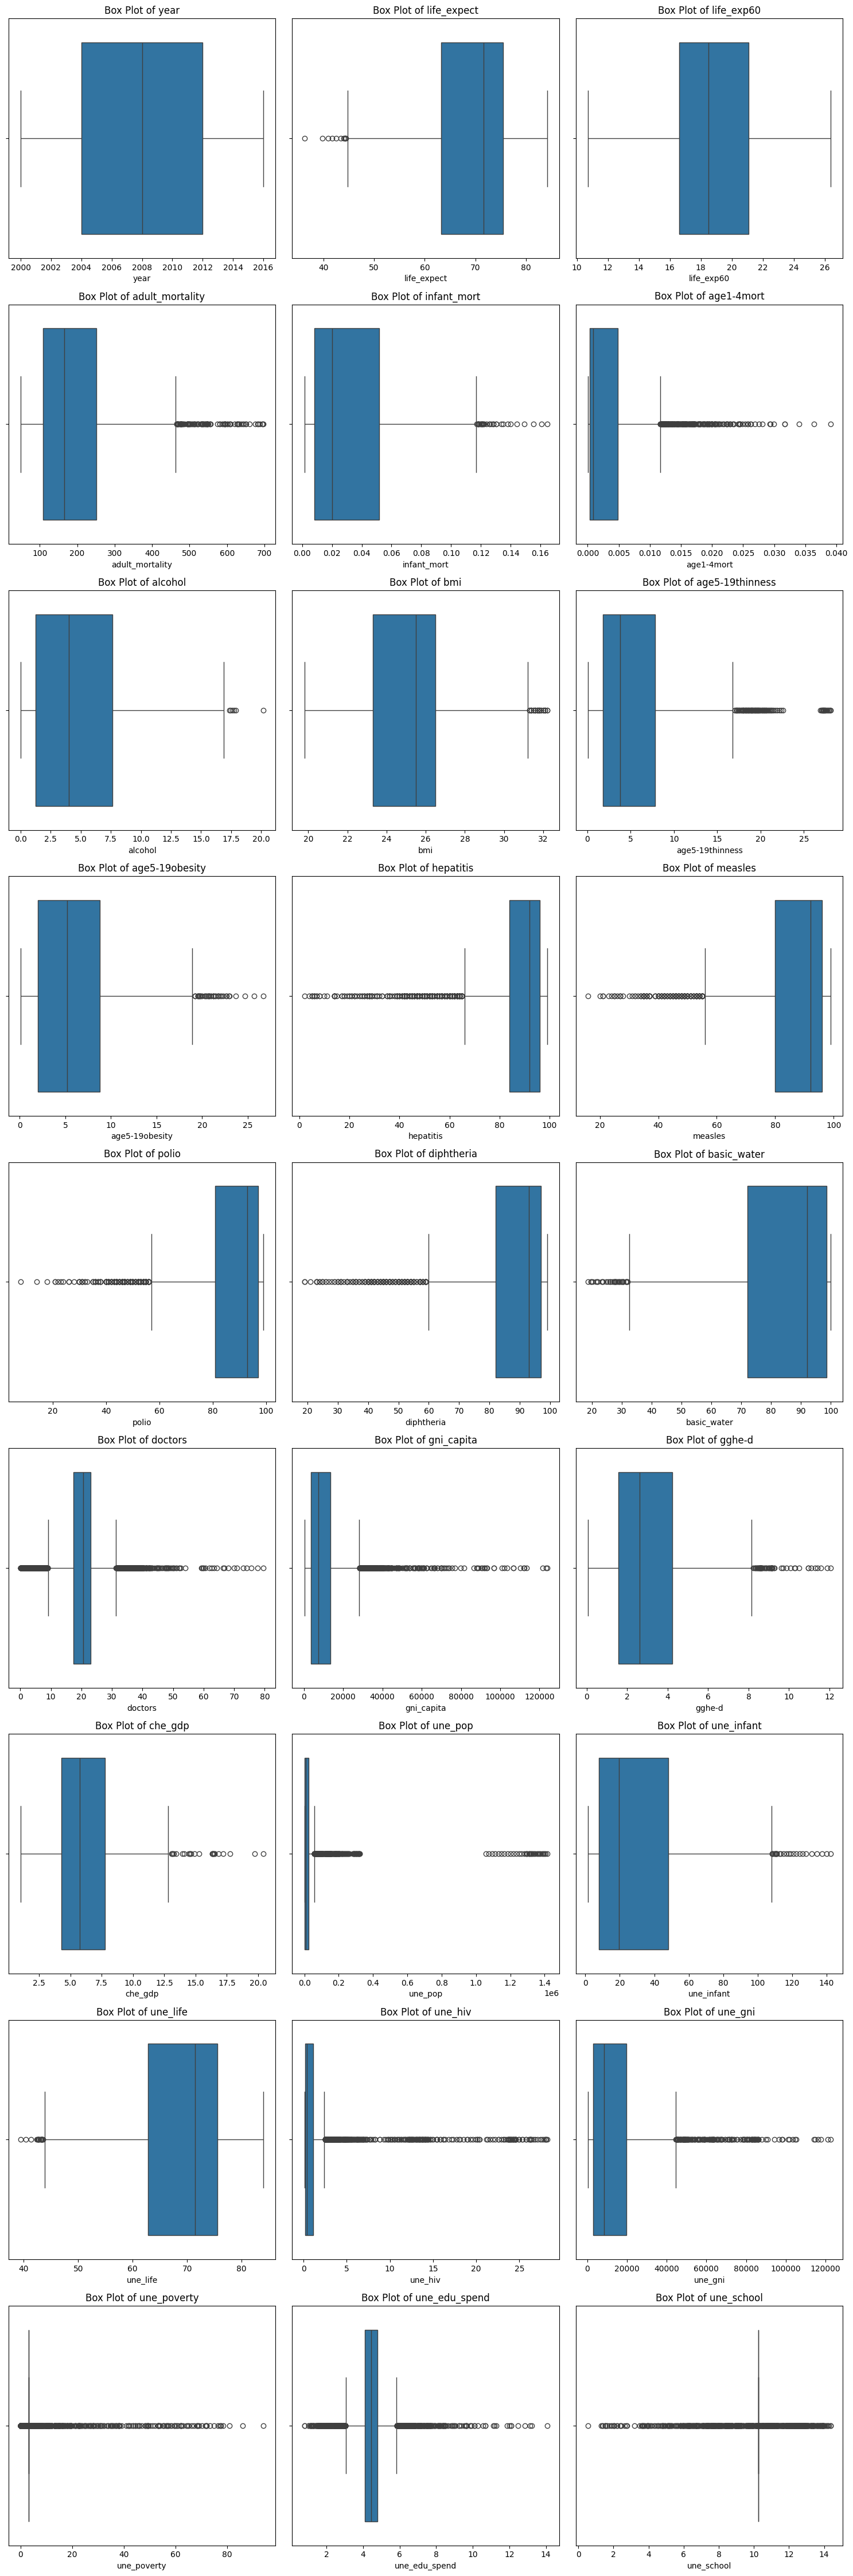

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = data_Missing_filled.select_dtypes(include=['float64', 'int64']).columns

# Number of variables
num_vars = len(numeric_columns)

# Define the grid size
cols = 3  # Number of columns in the grid
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows dynamically

# Create a grid of box plots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5)) 
axes = axes.flatten()  
# Plot box plots for each variable
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=data_Missing_filled, x=column, ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


Based on the univariate analysis using histograms, box plots, and density estimators, the following observations were made:

- **Columns with a normal distribution**:
  - `life_exp60`.

- **Columns that are mostly normally distributed but contain a few outliers**:
  - `life_expect`, `une_life`, `alcohol`, and `bmi`.

- **Columns that are left-skewed**:
  - `hepatitis`, `measles`, `polio`, `diphtheria`, `basic_water`, and `une_school`.

- **Columns that are right-skewed**:
  - `adult_mortality`, `infant_mort`, `age1-4mort`, `age5-19thinness`, `age5-19obesity`, `doctors`, `gni_capita`, `gghe-d`, `che_gdp`, `une_pop`, `une_infant`, `une_hiv`, `une_gni`, `une_poverty`, and `une_edu_spend`.

This analysis highlights the distributional characteristics of each column, which will guide the selection of appropriate transformation techniques and statistical methods for further analysis.

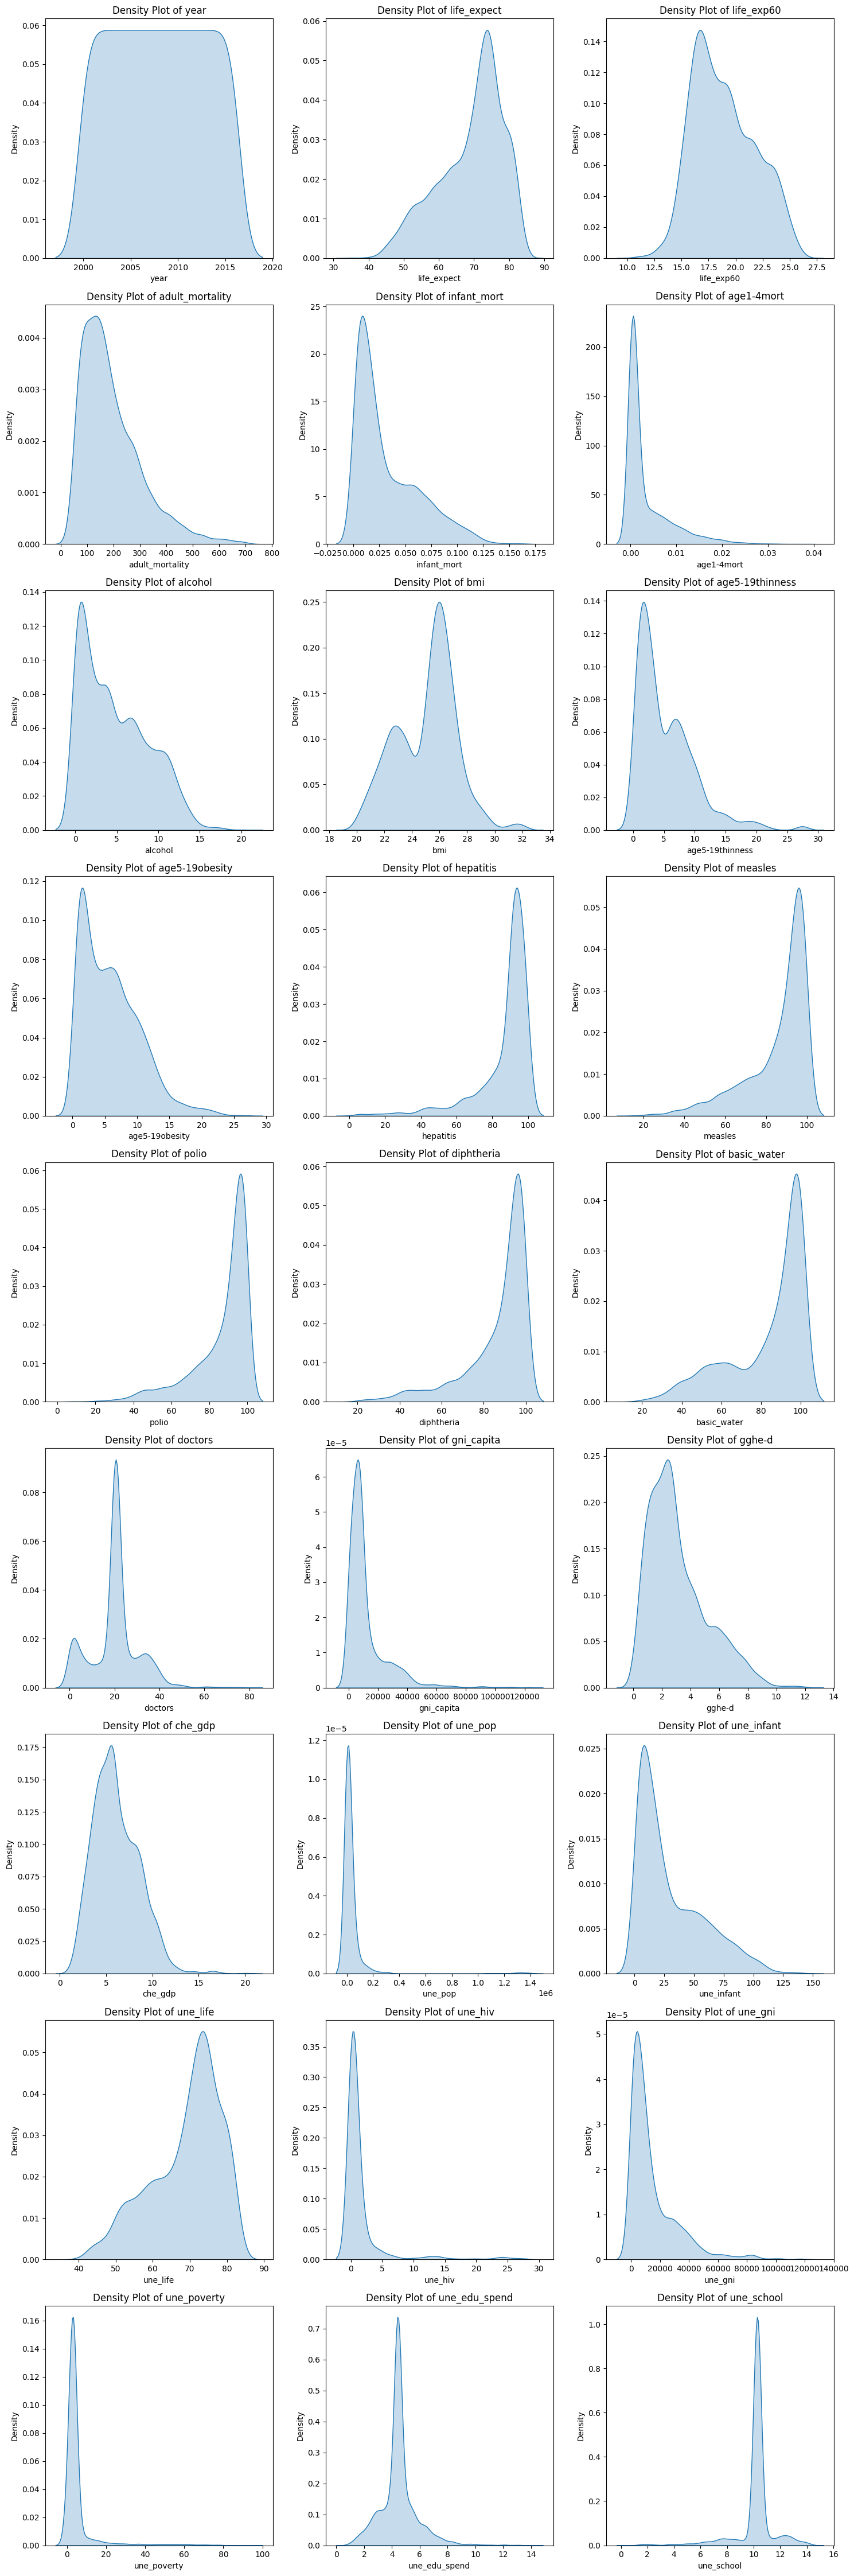

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = data_Missing_filled.select_dtypes(include=['float64', 'int64']).columns

# Number of variables
num_vars = len(numeric_columns)

# Define the grid size
cols = 3  # Number of columns in the grid
rows = (num_vars // cols) + (num_vars % cols > 0) 

# Create a grid of density plots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  
axes = axes.flatten()  
# Plot density plots for each variable
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=data_Missing_filled, x=column, ax=axes[i], fill=True)
    axes[i].set_title(f"Density Plot of {column}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


#### Bivariate Analysis

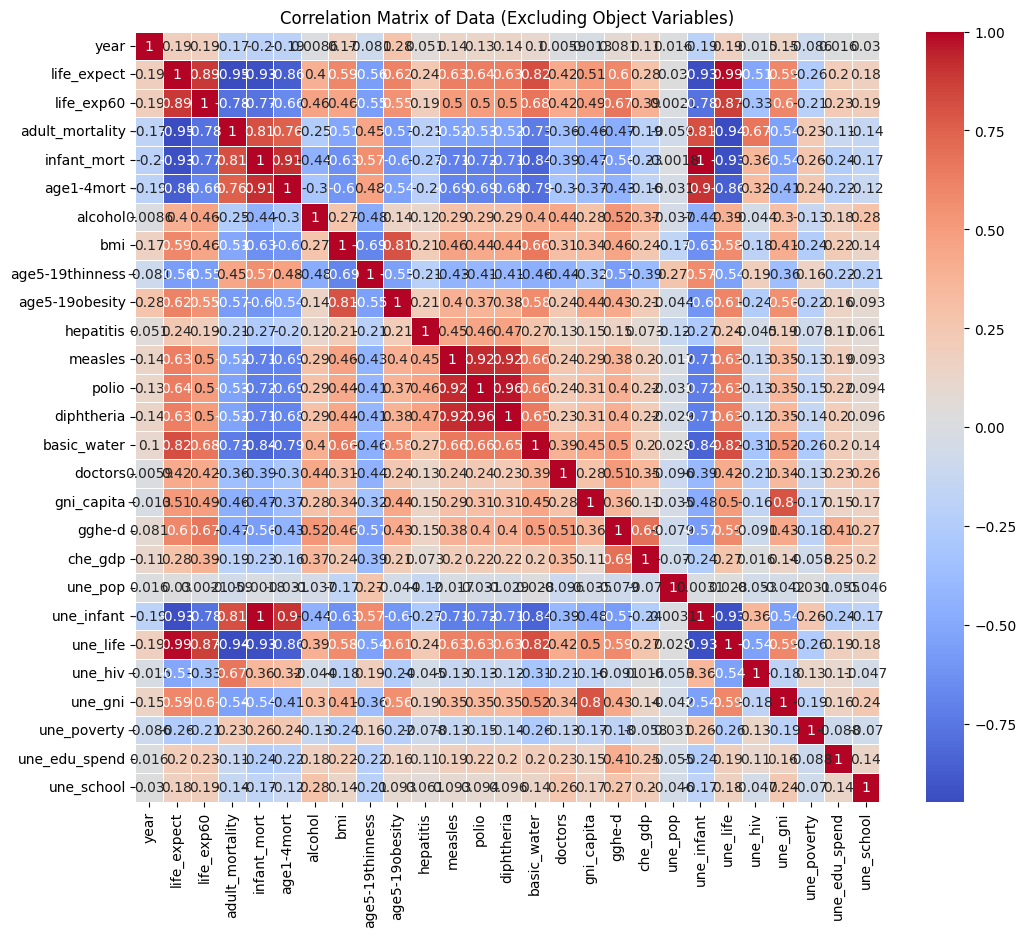

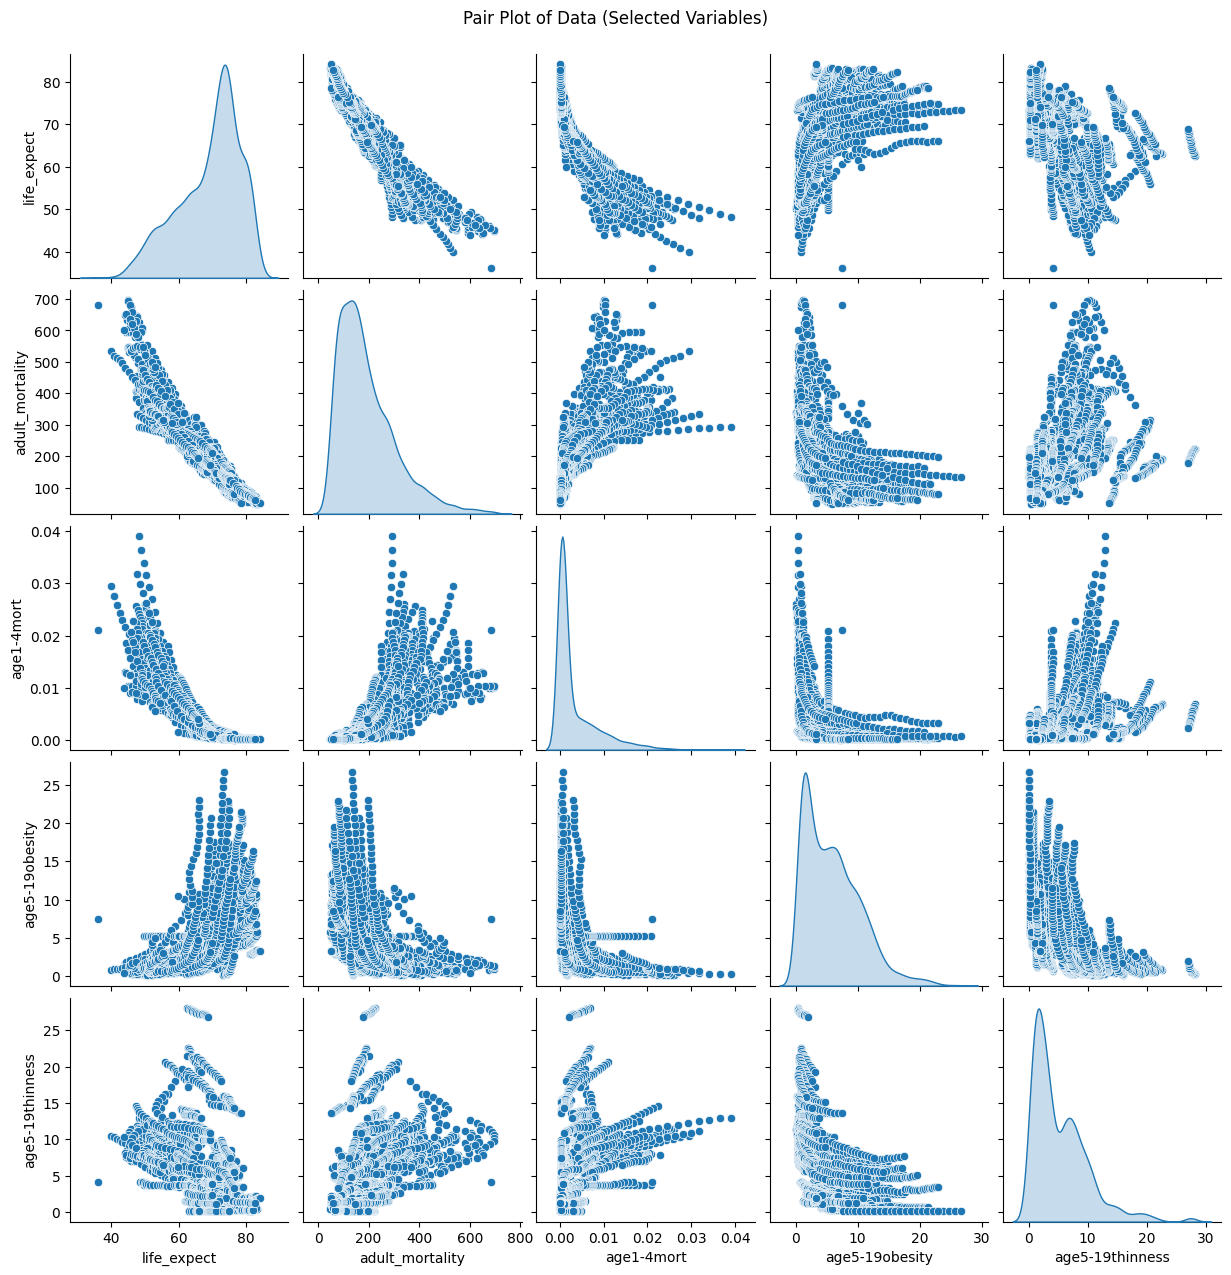

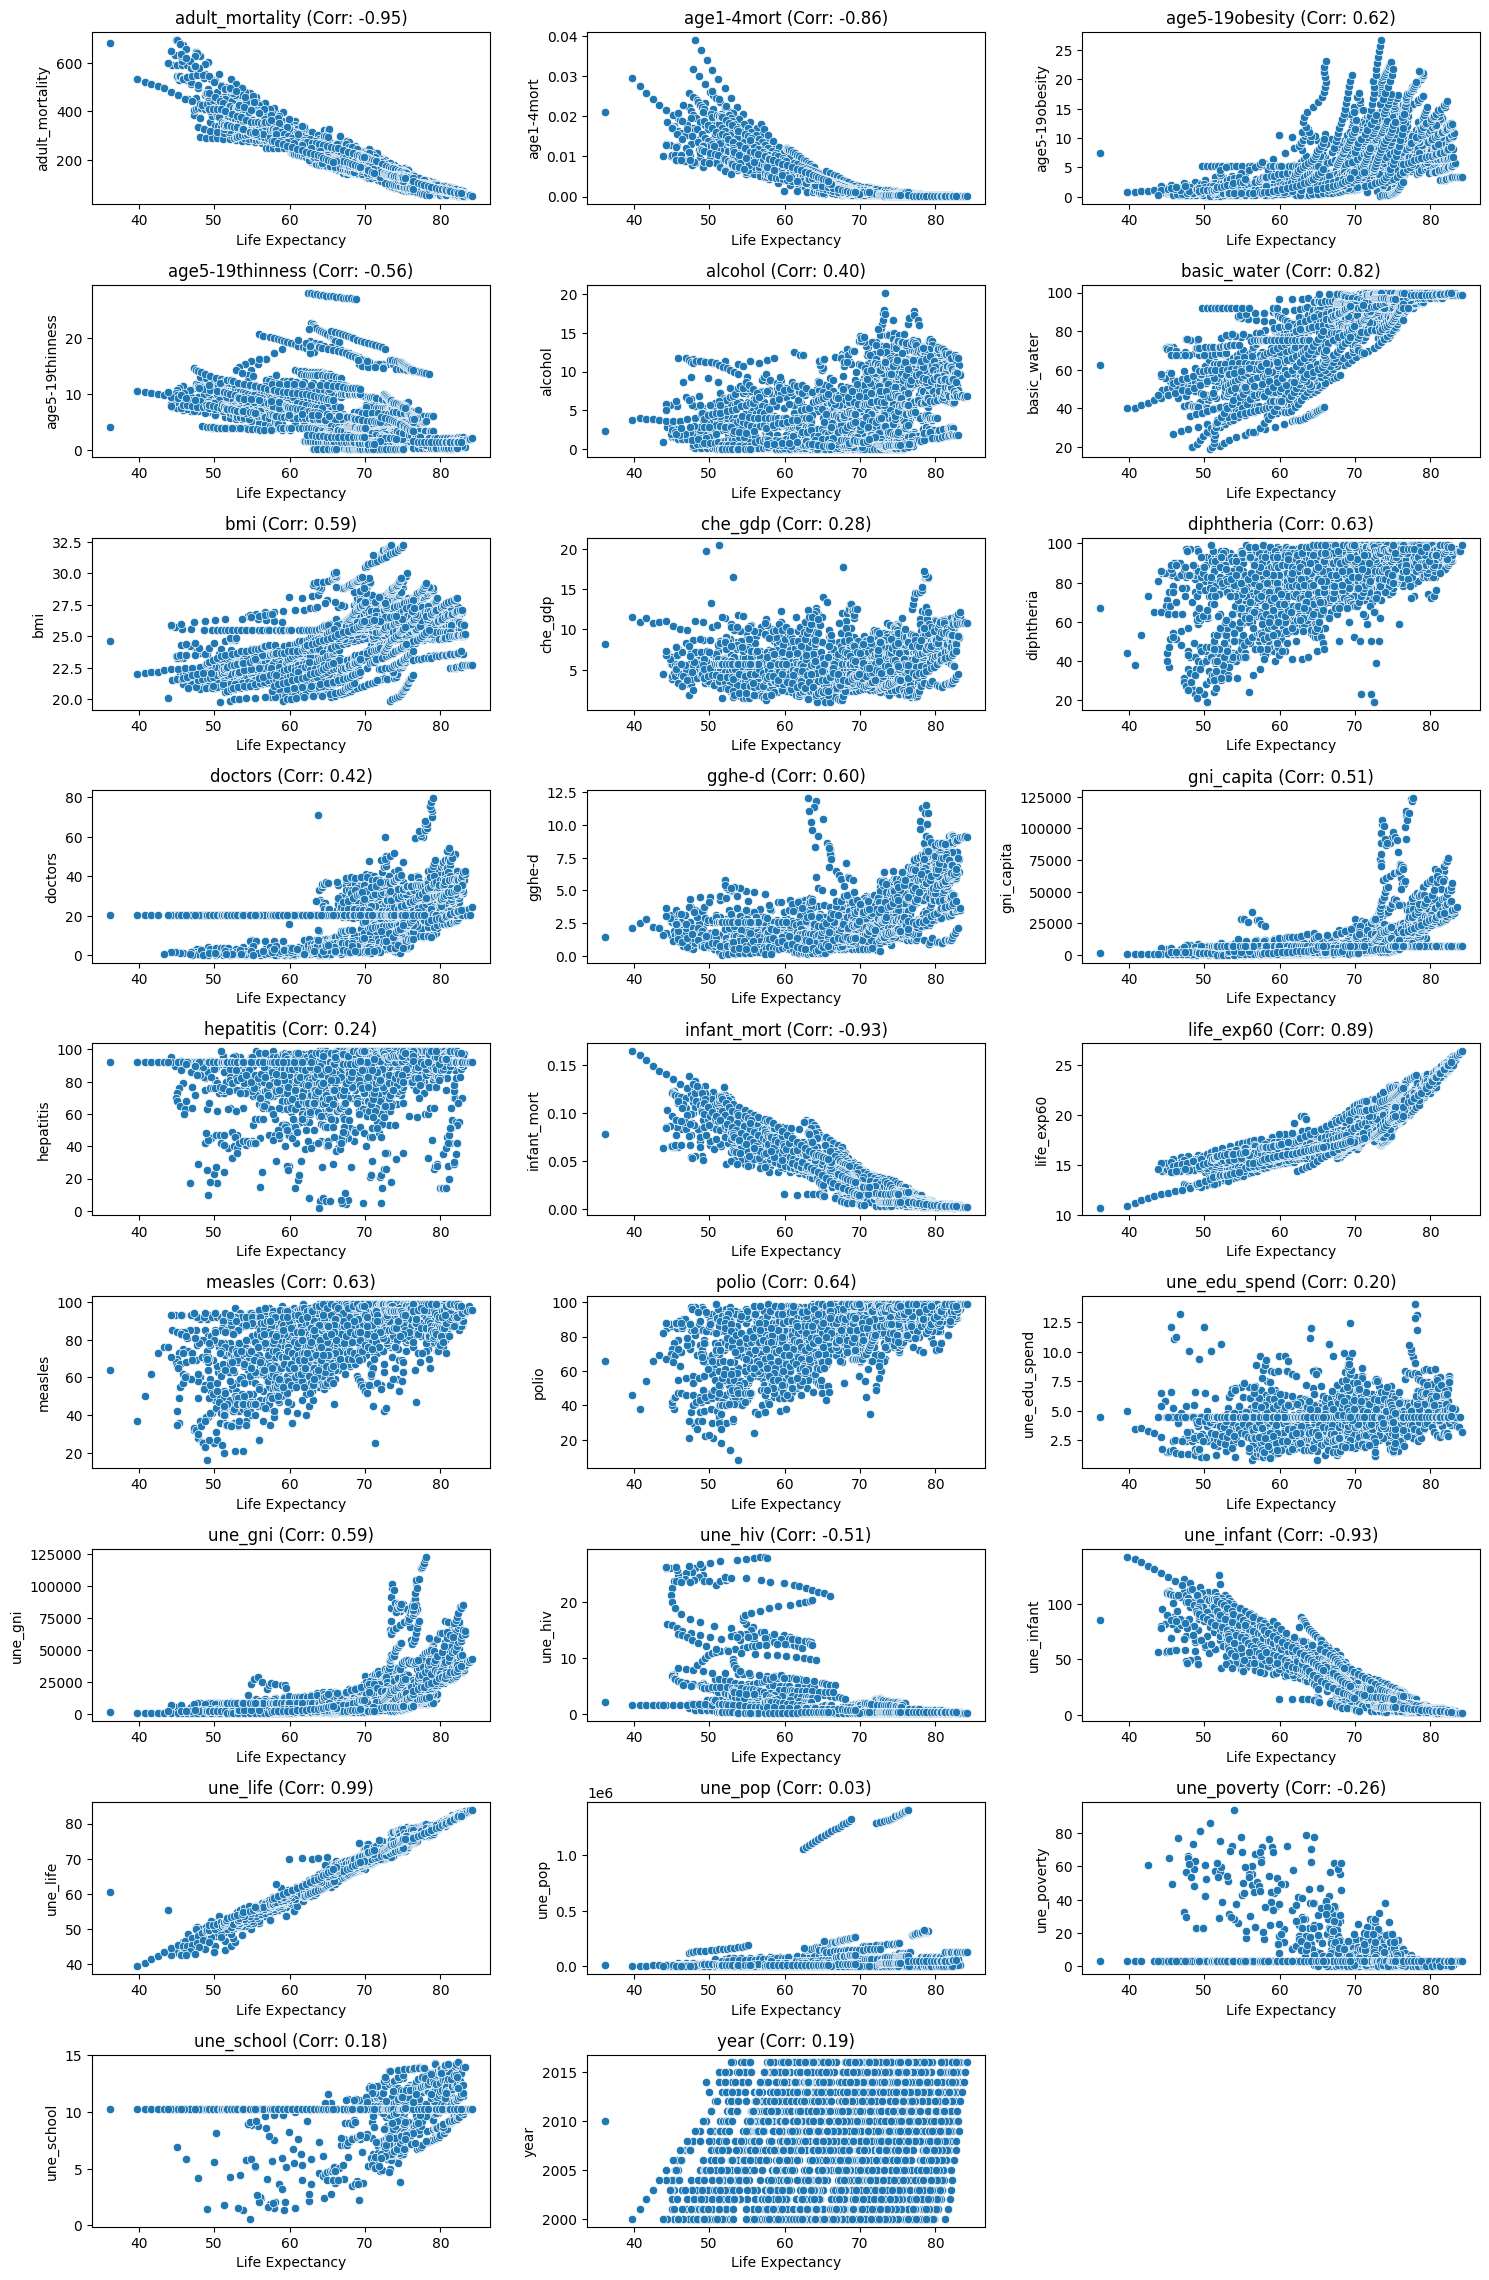

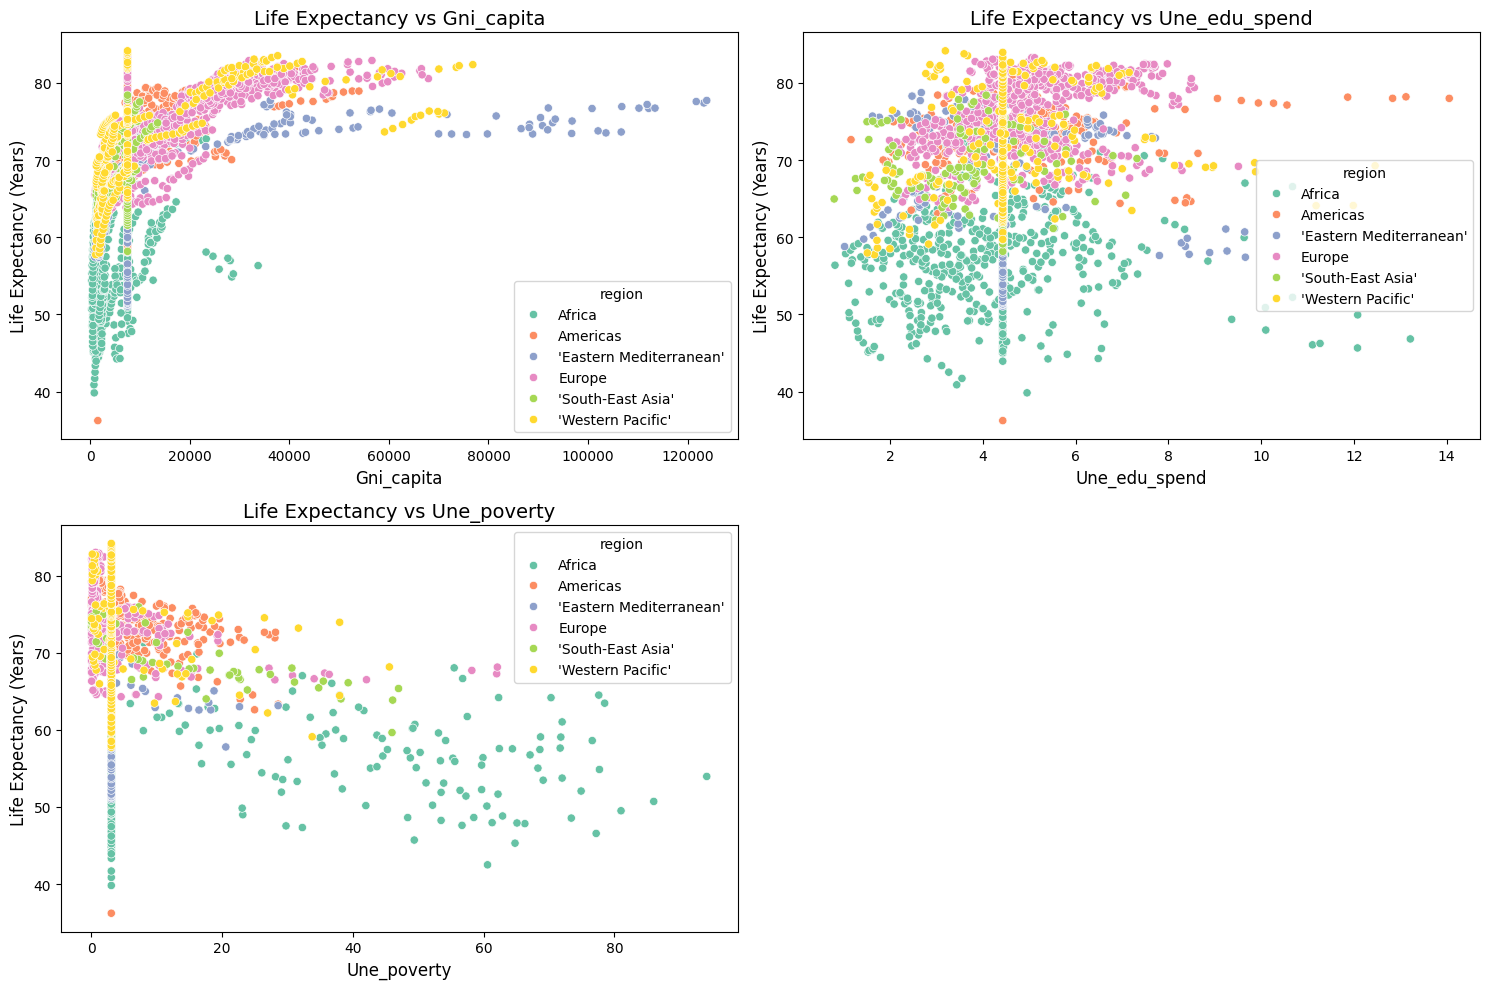

In [32]:


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude the first three object variables from the dataset
numeric_columns = data_Missing_filled.select_dtypes(include=['float64', 'int64']).columns
# Compute the correlation matrix
corr_matrix = data_Missing_filled[numeric_columns].corr()

# Plot Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Data (Excluding Object Variables)")
plt.show()
# Pairplot for non-transformed data
pair_plot_columns = ['life_expect'] + list(numeric_columns.difference(['life_expect']))[:4]  # Limit variables for clarity
sns.pairplot(data=data_Missing_filled, vars=pair_plot_columns, diag_kind="kde", kind="scatter")
plt.suptitle("Pair Plot of Data (Selected Variables)", y=1.02)
plt.show()

### 3. Scatterplots with Correlation Annotations ###
# Calculate correlations with life_expect (using only numeric columns)
correlations = data_Missing_filled[numeric_columns].corr()['life_expect']

# Scatterplots for life_expect vs all other numeric columns
plt.figure(figsize=(15, 25))
for i, column in enumerate(numeric_columns.difference(['life_expect'])):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.scatterplot(x=data_Missing_filled['life_expect'], y=data_Missing_filled[column])
    
    # Annotate with correlation value
    corr_value = correlations[column]
    plt.title(f"{column} (Corr: {corr_value:.2f})")
    plt.xlabel("Life Expectancy")
    plt.ylabel(f"{column}")

plt.tight_layout()
plt.show()

# Scatter plots for life expectancy vs socioeconomic factors
socioeconomic_factors = ['gni_capita', 'une_edu_spend', 'une_poverty']

plt.figure(figsize=(15, 10))
for i, factor in enumerate(socioeconomic_factors):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=data_Missing_filled, x=factor, y='life_expect', hue='region', palette='Set2')
    plt.title(f'Life Expectancy vs {factor.capitalize()}', fontsize=14)
    plt.xlabel(factor.capitalize(), fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.tight_layout()
plt.show()



#### Correlation Matrix ####

The correlation matrix reveals significant relationships among the variables. Health outcomes, such as adult mortality, infant mortality, and age 1-4 mortality, as well as age 5-19 thinness, exhibit a strong negative correlation with life expectancy. Conversely, access to basic water and life expectancy after age 60 (`life_exp60`) show a strong positive correlation with life expectancy. Moderate positive correlations are observed with lifestyle and health behavior variables, including alcohol consumption, BMI, and age 5-19 obesity. Economic indicators, such as gross national income per capita (gni_capita) and domestic health expenditure (`gghe_d`), along with access to doctors, also display moderate positive correlations with life expectancy. Additionally, vaccination and preventive measures, such as immunization rates for measles, polio, and diphtheria, demonstrate moderate positive correlations. In contrast, weak correlations are found with variables like hepatitis and certain other socioeconomic factors.

#### Pair PLots ####
Focus on trends and clusters observed in the pair plot, such as how variables with strong correlations (like infant mortality and life expectancy) show clear negative or positive relationships.
The pair plot provides a visual representation of the relationships between life expectancy and other variables, supporting the findings from the correlation matrix. Variables such as `adult_mortality`, `infant_mortality`, and `age 1-4 mortality` display a clear negative relationship with life expectancy, while access to `basic water` and `life expectancy` after age 60 exhibit a positive relationship. Lifestyle variables, including `alcohol consumption` and `BMI`, show moderate patterns, while socioeconomic indicators like `gni_capita` and vaccination rates (`measles`, `polio`, `diphtheria`) also exhibit discernible relationships. Variables with weaker correlations, such as hepatitis, display less distinct patterns.

#### Scatter Plots ####

Highlight individual relationships between life expectancy and other variables, emphasizing noticeable trends (e.g., linear or non-linear patterns).
The scatter plots visually demonstrate the relationships between life expectancy and individual variables. Strong negative trends are observed with variables like `adult mortality` and `infant mortality`, while positive trends are evident with access to `basic water` and `life expectancy after age 60`. Economic and health behavior indicators, such as `gni_capita`, `alcohol consumption`, and vaccination rates, show moderate associations with life expectancy. However, weaker relationships, such as with hepatitis, result in more dispersed patterns without clear trends.

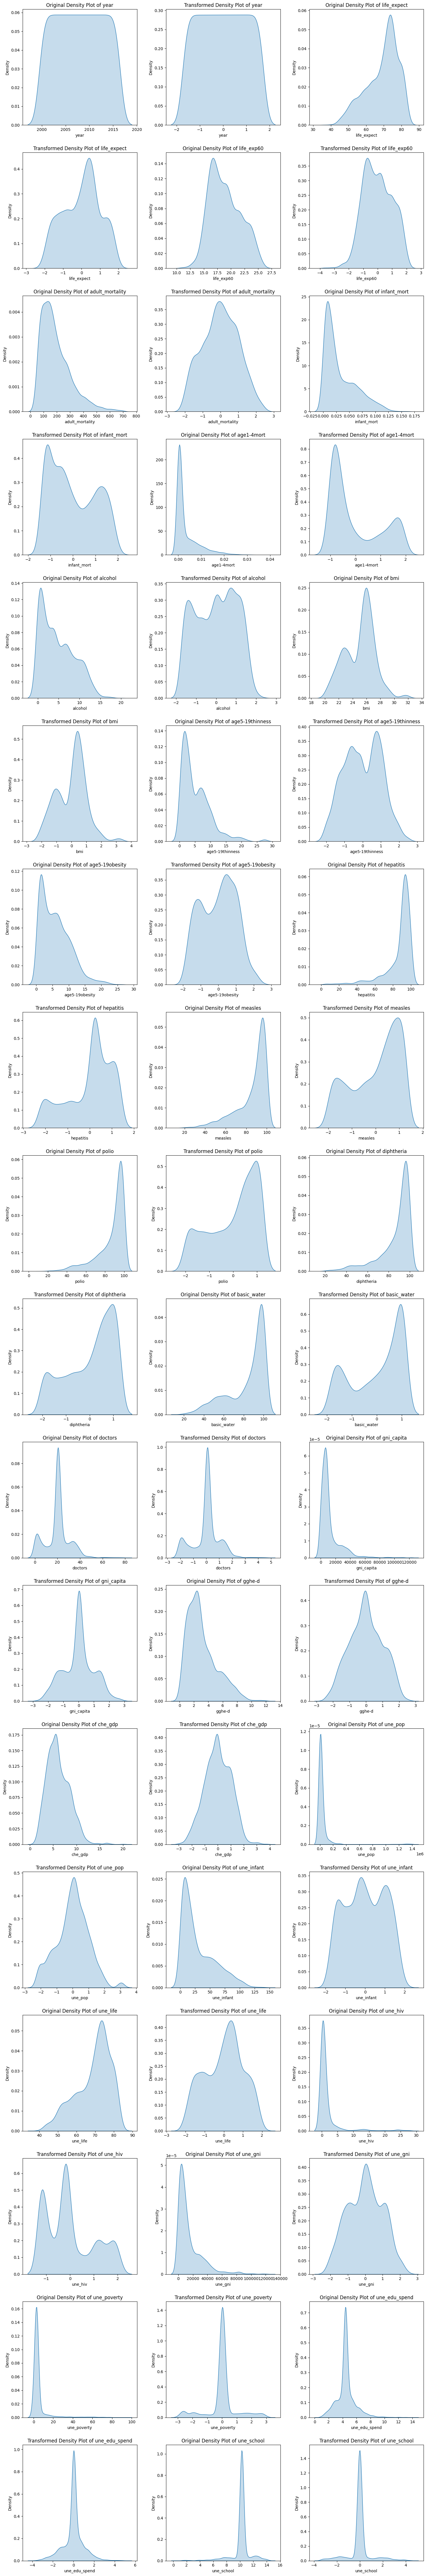

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

numeric_columns = data_Missing_filled.select_dtypes(include=['float64', 'int64']).columns

# Apply Yeo-Johnson transformation
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
transformed_data = yeo_johnson_transformer.fit_transform(data_Missing_filled[numeric_columns])

# Convert transformed data back to a DataFrame
data_transformed = pd.DataFrame(transformed_data, columns=numeric_columns)

# Number of variables
num_vars = len(numeric_columns)
cols = 3  
rows = (num_vars // cols) + (num_vars % cols > 0)  
fig, axes = plt.subplots(rows * 2, cols, figsize=(15, rows * 10))  
axes = axes.flatten()  

# Plot density plots for each variable (before and after transformation)
for i, column in enumerate(numeric_columns):
    # Original data density plot
    sns.kdeplot(data=data_Missing_filled, x=column, ax=axes[i * 2], fill=True)
    axes[i * 2].set_title(f"Original Density Plot of {column}")
    
    # Transformed data density plot
    sns.kdeplot(data=data_transformed, x=column, ax=axes[i * 2 + 1], fill=True)
    axes[i * 2 + 1].set_title(f"Transformed Density Plot of {column}")

# Remove empty subplots (if any)
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  
plt.show()


Yeo-Johnson Transformation:

The PowerTransformer from sklearn is applied to all numeric columns in the dataset.
Transformed data is stored in data_transformed.
Double Row Grid:

Each variable has two density plots: one for the original data and another for the transformed data.
The number of rows is doubled to accommodate "before and after" plots.
Density Plot for Each Variable:

The original data density plot is drawn using the data_Missing_filled DataFrame.
The transformed data density plot is drawn using the data_transformed DataFrame.
Dynamic Subplot Management:

This provides a clear visual representation of how the transformation reduces skewness and prepares the data for further analysis.


## 5. Data Preparation for Multiple Linear Regression, Polynomial Regression, and Regularization Techniques

Before we can use our data to train a machine learning model, we need to prepare it. 

This involves separating the dependent and independent variables and splitting the data into training and testing sets.

### 5-1. Separating Dependent and Independent Variables

In our dataset, 'life_expect' is the dependent variable (the one we want to predict), while all other columns are independent variables (the ones we use to make the prediction).

In [34]:
df_mlr=data_transformed
# Define independent and dependent variables
X = df_mlr.drop('life_expect', axis=1)  
y = df_mlr['life_expect']              

### 5-2. Train-Test Split


Next, we split our data into training set and testing set. 

Training set is used to train our model while testing set is used to evaluate its performance.

We typically keep 70-80% of data in training set and remaining in testing set. 

This ratio can be adjusted based on size of your dataset but it's important not to keep too little data for testing because then evaluation results might not be reliable.

We'll use **sklearn's train_test_split()** function which randomly splits data into training and testing sets.

In [35]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train(70%) and test(30%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Here *test_size=0.3* means 30% of data will go into test set and rest will go into training set. 

- *random_state* parameter is used for initializing internal random number generator which will decide splitting of data into train-test sets.

## 6. Building the Model 

After preparing our data, we can now build our multiple linear regression model. 

We will use *sklearn's LinearRegression()* for this purpose.

### 6-1. Building the Model

First, we create an instance of *LinearRegression* class. This object represents our linear regression model.

           Variable  Coefficient       P-Value  Abs_Coefficient
3   adult_mortality    -0.315289  0.000000e+00         0.315289
21         une_life     0.243609  1.601874e-94         0.243609
2        life_exp60     0.206246  0.000000e+00         0.206246
5        age1-4mort    -0.139437  1.326131e-67         0.139437
4       infant_mort    -0.068751  2.468484e-05         0.068751
8   age5-19thinness    -0.037060  1.813316e-30         0.037060
20       une_infant    -0.031124  2.623869e-02         0.031124
7               bmi    -0.016716  5.603846e-06         0.016716
14      basic_water     0.013686  2.103906e-04         0.013686
17           gghe-d    -0.013303  1.661832e-05         0.013303
10        hepatitis    -0.011283  4.741361e-08         0.011283
13       diphtheria     0.009812  9.191028e-02         0.009812
1              year     0.008944  5.391576e-08         0.008944
12            polio     0.008793  1.310181e-01         0.008793
22          une_hiv    -0.008777  9.4166

/tmp/ipykernel_18977/2409458183.py:117: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='Model Name', y='RMSE', data=results_df, join=True, markers="o", color='blue')


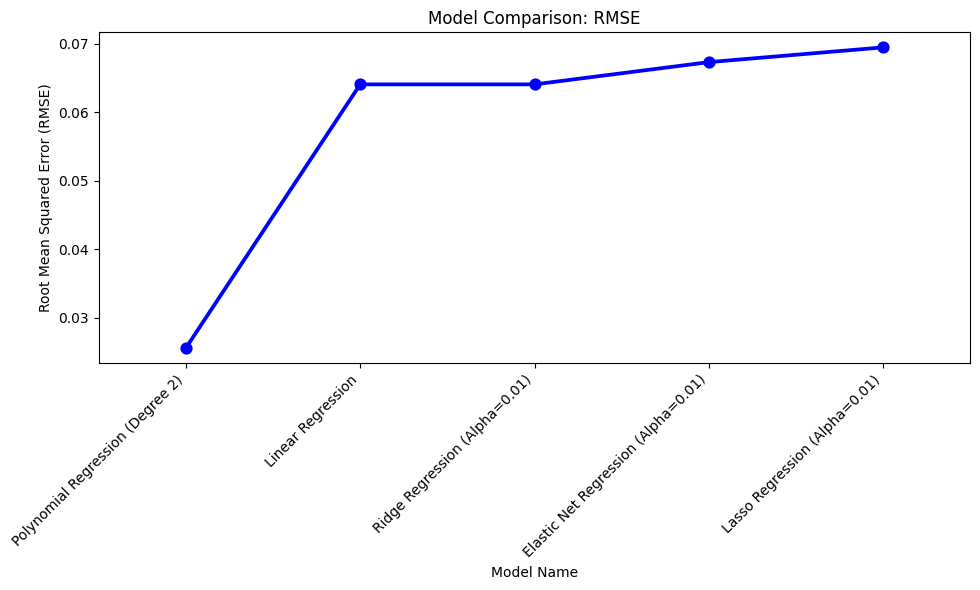

Model Comparison Results:
Linear Regression: RMSE = 0.0641
Polynomial Regression (Degree 2): RMSE = 0.0256
Lasso Regression (Alpha=0.01): RMSE = 0.0695
Ridge Regression (Alpha=0.01): RMSE = 0.0641
Elastic Net Regression (Alpha=0.01): RMSE = 0.0673


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# # Example dataset splitting
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Store results for comparison
results = {}

### 1. Linear Regression ###
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
results['Linear Regression'] = rmse_lr

import pandas as pd
import statsmodels.api as sm

# Add a constant to the predictors
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Get p-values and coefficients
coefficients = ols_model.params
pvalues = ols_model.pvalues

# Combine into a DataFrame for clarity
results_df = pd.DataFrame({
    'Variable': coefficients.index,  # Variable names
    'Coefficient': coefficients.values,  # Coefficients
    'P-Value': pvalues.values  # P-values
})

# Sort by absolute value of coefficients (optional)
results_df['Abs_Coefficient'] = results_df['Coefficient'].abs()
results_df = results_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display all results
pd.set_option('display.max_rows', None)  # Show all rows
print(results_df)

# Save the results to a CSV (optional)
results_df.to_csv('ols_regression_results.csv', index=False)

### 2. Polynomial Regression ###
degree = 2  # Adjust degree as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
results[f'Polynomial Regression (Degree {degree})'] = rmse_poly

### 3. Lasso Regression (with Cross-Validation over Alpha) ###
lasso_alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # Range of alpha values
lasso_rmse = []
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    lasso_rmse.append((alpha, rmse_lasso))

# Select the best alpha for Lasso
best_alpha_lasso, best_rmse_lasso = min(lasso_rmse, key=lambda x: x[1])
results[f'Lasso Regression (Alpha={best_alpha_lasso})'] = best_rmse_lasso

### 4. Ridge Regression (with Cross-Validation over Alpha) ###
ridge_alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # Range of alpha values
ridge_rmse = []
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ridge_rmse.append((alpha, rmse_ridge))

# Select the best alpha for Ridge
best_alpha_ridge, best_rmse_ridge = min(ridge_rmse, key=lambda x: x[1])
results[f'Ridge Regression (Alpha={best_alpha_ridge})'] = best_rmse_ridge

### 5. Elastic Net Regression (with Cross-Validation over Alpha) ###
elastic_net_alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # Range of alpha values
elastic_net_rmse = []
for alpha in elastic_net_alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42)
    elastic_net.fit(X_train, y_train)
    y_pred_en = elastic_net.predict(X_test)
    rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
    elastic_net_rmse.append((alpha, rmse_en))

# Select the best alpha for Elastic Net
best_alpha_en, best_rmse_en = min(elastic_net_rmse, key=lambda x: x[1])
results[f'Elastic Net Regression (Alpha={best_alpha_en})'] = best_rmse_en

### 6. Plotting the Results ###
# Convert results to a DataFrame for plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model Name', 'RMSE'])

# Sort results by RMSE for better visualization
results_df = results_df.sort_values(by='RMSE', ascending=True)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Model Name', y='RMSE', data=results_df, join=True, markers="o", color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Name')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

# Print results
print("Model Comparison Results:")
for model, rmse in results.items():
    print(f"{model}: RMSE = {rmse:.4f}")


This code aims to compare the performance of different regression models—Linear Regression, Polynomial Regression, Lasso, Ridge, and Elastic Net—for predicting the target variable using the dataset provided. The models are evaluated based on their Root Mean Squared Error (RMSE), with additional analysis of hyperparameter tuning for regularized models.

##### **Models Implemented** #####

Linear Regression: Used as the baseline model to evaluate the performance of other methods.

Polynomial Regression: Included to capture non-linear relationships by transforming the features to a polynomial degree.

Lasso Regression: A linear model with L1 regularization to handle feature selection and reduce overfitting.

Ridge Regression: A linear model with L2 regularization to address multicollinearity.
Elastic Net Regression: A combination of L1 and L2 regularization that balances feature selection and multicollinearity handling.

##### **Cross-Validation and Hyperparameter Tuning** #####

Describe how cross-validation was applied for Lasso, Ridge, and Elastic Net to determine the optimal alpha values.

Specify the range of alpha values tested and the rationale behind using cross-validation for model evaluation.

### **Model Evaluation and Comparison**

#### **Evaluation Metric: Root Mean Squared Error (RMSE)**
RMSE measures the average magnitude of prediction errors, with lower values indicating better model performance.

#### **Model Comparison:**
- **Polynomial Regression (Degree 2):**
  - **RMSE:** 0.0256 (Best-performing model)
  - **Performance:** Captures non-linear relationships effectively, significantly outperforming other models, indicating the importance of non-linear interactions in the dataset.
  
- **Linear Regression:**
  - **RMSE:** 0.0641
  - **Performance:** Performs well but is outperformed by Polynomial Regression due to its inability to model non-linear relationships.

- **Regularized Models:**
  - **Lasso Regression (Alpha = 0.01):**
    - **RMSE:** 0.0695
    - **Performance:** Slightly higher RMSE than Linear Regression; L1 regularization likely reduced overfitting but introduced higher bias.
  - **Ridge Regression (Alpha = 0.01):**
    - **RMSE:** 0.0641
    - **Performance:** Similar to Linear Regression, indicating minimal impact of L2 regularization at this alpha value.
  - **Elastic Net Regression (Alpha = 0.01):**
    - **RMSE:** 0.0673
    - **Performance:** Comparable to Lasso, balancing L1 and L2 regularization but not outperforming Linear Regression.

#### **Key Observations:**
1. **Polynomial Regression** is the best-performing model, capturing non-linear relationships that other models missed.
2. Regularized models (Lasso, Ridge, Elastic Net) did not outperform Linear Regression significantly, suggesting limited multicollinearity or regularization effects at the tested alpha values.
3. Lasso and Elastic Net introduced slight trade-offs between bias and variance, resulting in marginally higher RMSE values.

#### **Conclusion:**
**Polynomial Regression (Degree 2)** is the recommended model due to its superior performance and ability to handle non-linear relationships. While regularized models provide robust alternatives, they did not demonstrate significant improvements in this analysis. Further tuning of alpha values or feature engineering may enhance the performance of regularized models in future studies.

## 7. Checking Model Assuptions

here are the main assumptions in multiple linear regression:

1. **Linearity:** The relationship between predictors and outcome variable should be linear.
2. **Independence:** The residuals (prediction errors) are independent of each other.
3. **Homoscedasticity:** The variance of residuals is constant across all levels of predictors.
4. **Normality:** The residuals are normally distributed.
5. **No Multicollinearity:** Predictors are not perfectly correlated with each other.


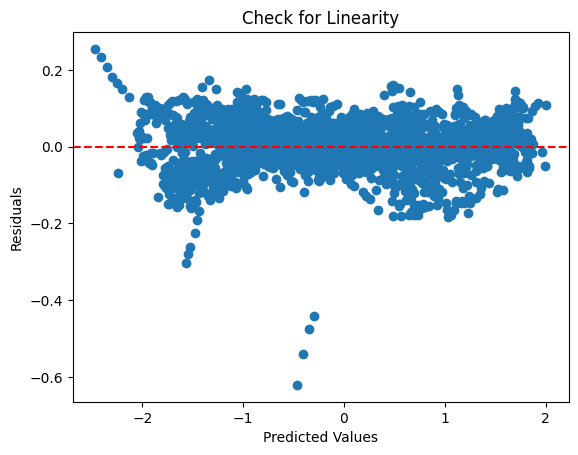

Durbin-Watson: 2.0087696265106483


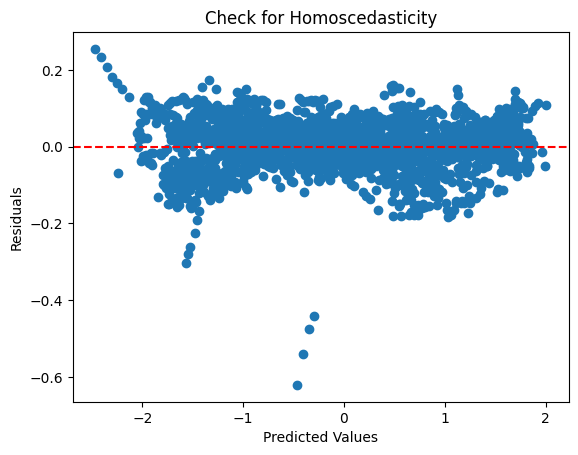

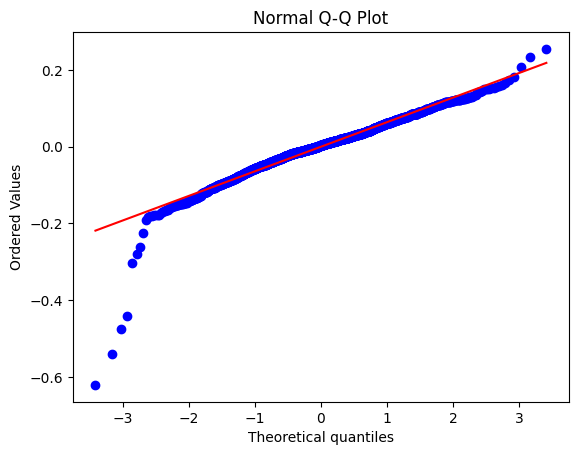

Variance Inflation Factor (VIF):
            Feature         VIF
0              year    1.338333
1        life_exp60    9.284402
2   adult_mortality   19.142371
3       infant_mort  126.930505
4        age1-4mort   28.860890
5           alcohol    2.801065
6               bmi    6.831976
7   age5-19thinness    4.924151
8    age5-19obesity    7.415211
9         hepatitis    2.105242
10          measles    6.360476
11            polio   16.944257
12       diphtheria   16.799899
13      basic_water    6.856748
14          doctors    1.611128
15       gni_capita    4.707756
16           gghe-d    4.594467
17          che_gdp    2.568509
18          une_pop    1.359691
19       une_infant   94.558794
20         une_life   62.657172
21          une_hiv    2.524297
22          une_gni    9.153434
23      une_poverty    1.271829
24    une_edu_spend    1.327848
25       une_school    1.345815


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Example dataset splitting
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Store results for comparison
results = {}


### 1. Linear Regression ###
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
results['Linear Regression'] = rmse_lr

# Residuals for assumption checks
y_pred_train = lr.predict(X_train)
residuals = y_train - y_pred_train

# Check assumptions
# 1. Linearity
plt.scatter(y_pred_train, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Check for Linearity')
plt.show()

# 2. Independence (Durbin-Watson Test)
durbinWatson = durbin_watson(residuals)
print("Durbin-Watson:", durbinWatson)

# 3. Homoscedasticity
plt.scatter(y_pred_train, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.show()

# 4. Normality of Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

# 5. Multicollinearity (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Concise Analysis of Model Assumptions
1. Linearity Check
Observation: Residuals scatter randomly around zero, indicating linearity is mostly satisfied, though outliers exist.
Implication: The model captures linear patterns, but outliers may affect performance and should be investigated.
2. Homoscedasticity Check
Observation: Residual variance is consistent across predicted values, meeting the homoscedasticity assumption, but with some outliers.
Implication: Predictions are reliable, but outliers need further review.
3. Normality Check
Observation: Residuals align well with the diagonal in the Q-Q plot, indicating approximate normality, with deviations at the tails.
Implication: The model satisfies normality overall, but extreme residuals may require attention.
4. Variance Inflation Factor (VIF)
Key Findings:
High Multicollinearity: infant_mort (126.93), une_infant (94.56), une_life (62.66), and age1-4mort (28.86).
Moderate Multicollinearity: life_exp60 (9.28), une_gni (9.15), and others.
Low Multicollinearity: Variables like year, doctors, and une_school have minimal multicollinearity.
Implication: Multicollinearity in key variables (e.g., infant_mort, une_infant) could destabilize coefficients. Address redundancy using PCA, variable selection, or regularization (e.g., Lasso).


Summary
The model largely satisfies assumptions but shows potential issues with outliers and multicollinearity. Addressing outliers and reducing multicollinearity through feature selection or dimensionality reduction is recommended before refining the model.

#### 8. Results and Interpretation ####

In [38]:
# Ensure 'life_expect' is numeric
df['life_expect'] = pd.to_numeric(df['life_expect'], errors='coerce')

# Drop rows with missing values in 'life_expect' (optional)
df = df.dropna(subset=['life_expect'])

# Filter countries with life expectancy between 30 and 40
low_life_expectancy_countries = df[df['life_expect'].between(10, 40)]
print("Countries with Life Expectancy between 30 and 40:")
print(low_life_expectancy_countries[['country', 'life_expect']])


# Ensure 'life_expect' is numeric
df['life_expect'] = pd.to_numeric(df['life_expect'], errors='coerce')
df = df.dropna(subset=['life_expect'])
high_life_expectancy_countries = df[df['life_expect'] > 83]

# Get unique country names
unique_high_life_expectancy_countries = high_life_expectancy_countries['country'].unique()
print("\nUnique Countries with Life Expectancy greater than 83:")
print(unique_high_life_expectancy_countries)


Countries with Life Expectancy between 30 and 40:
             country  life_expect
374   'Sierra Leone'     39.82734
1166           Haiti     36.22736

Unique Countries with Life Expectancy greater than 83:
['Spain' 'Switzerland' 'Japan']


7. Results and Interpretation
#### Summary of Findings ####
**Objective 1**: Analyze the distribution and regional trends of life expectancy and socioeconomic factors
Life Expectancy Distribution:

Life expectancy is unimodal, with most countries having values around 70-80 years.
Some countries, such as `Sierra Leone` and `Haiti`, exhibit much lower life expectancies (30-40 years), likely reflecting extreme socioeconomic disadvantages.
Countries like `Spain`, `Switzerland`, and `Japan` have the highest life expectancies (>83 years), indicating advanced healthcare systems and stable economic conditions.
Analysis of Scatter Plots:

Life Expectancy vs GNI (Gross National Income) per Capita:
A strong positive relationship exists between `life expectancy` and `GNI per capita`. The relationship is nonlinear, with diminishing returns as life expectancy plateaus at very high GNI levels.
Life Expectancy vs Education Spending (`Une_edu_spend`):
A moderate positive trend is observed. Countries with higher education spending generally have longer life expectancies, though variability exists among regions.
Life Expectancy vs Poverty (`Une_poverty`):
A strong negative relationship is evident. Higher poverty rates are consistently associated with significantly lower life expectancies across regions.

**Objective 2**: Identify the top three socioeconomic factors influencing life expectancy
Based on the absolute values of regression coefficients:

Adult Mortality (Coefficient: -0.3153):
A strong negative relationship with life expectancy, indicating that higher adult mortality rates are associated with lower life expectancies.
`Une_life` (Coefficient: 0.2436):
A strong positive association, highlighting the importance of overall socioeconomic development in enhancing life expectancy.
`Life_exp60` (Coefficient: 0.2062):
A positive relationship with life expectancy, showing the importance of improved living conditions for older populations.
Interpretation of Top Variables:

These findings suggest that reducing adult mortality, improving socioeconomic conditions, and supporting older populations contribute significantly to increasing life expectancy.

**Objective 3**: Evaluate the impact of healthcare spending, education, and access to clean water
Regression Analysis and Hypothesis Testing:
The regression model confirmed that healthcare spending (`gghe_d`), education (`une_edu_spend`), and access to clean water (`basic_water`) all had significant positive impacts on life expectancy (𝑝<0.05).

**Hypothesis Testing Results:**
Null Hypothesis (𝐻0): Healthcare spending and clean water access have no significant impact on life expectancy.
Alternative Hypothesis (𝐻𝑎): Healthcare spending and clean water access significantly impact life expectancy.
The null hypothesis was rejected, supporting the conclusion that these factors are essential drivers of life expectancy.
Insights and Implications
#### Key Insights: ####
Income and Healthcare Access:
Higher GNI per capita and increased healthcare spending are critical drivers of life expectancy, emphasizing the importance of economic stability and robust healthcare systems.
Clean Water Access:
Regions with limited access to clean water exhibit significantly lower life expectancy, underscoring the need for improved water infrastructure.
Education Spending:
Educational investments strongly correlate with life expectancy, suggesting long-term benefits of prioritizing education.
Policy Implications:
Healthcare and Infrastructure:
Governments should prioritize increasing healthcare spending and ensuring access to clean water to improve national health outcomes.
Education:
Developing countries should focus on education as a long-term strategy to improve socioeconomic conditions and life expectancy.
Targeted Interventions:
Policymakers should address disparities in life expectancy by focusing on regions with high poverty rates and low access to clean water.

#### Limitations ####
Data Limitations:
Missing Data:Imputation for variables such as hospitals, poverty, and literacy may introduce bias.
Certain regions and countries are underrepresented, limiting the generalizability of findings.

Measurement Variability:
Variables such as education spending and healthcare access may be measured differently across countries.

Modeling Limitations:
Multicollinearity:High multicollinearity was observed for certain variables (e.g., infant mortality, une_life), which may inflate standard errors and affect coefficient estimates.

Nonlinear Relationships:
While polynomial regression was used, other non-linear models or feature engineering could better capture complex relationships.

Methodological Limitations:

Causation vs. Correlation:
While significant relationships were observed, these do not imply causation.
Confounding factors such as cultural differences and efficiency of healthcare systems were not accounted for.
